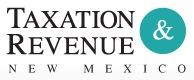![alphie 1.01.png align="right"](attachment:6395d056-2ebd-4209-a3cb-2e506c93246d.png )
**<h1><p style="text-align: center;">Alphie 2.02</p>**


<h11><p style="text-align: right;">
Written & maintained by:<br>
Asif Rasool<br><br>
Senior Economist<br>
Tax Analysis, Research & Statistics<br>
Office of the Secretary<br>
New Mexico Taxation & Revenue Department<br>
Phone: 505 490 0904<br>
Email: asif.rasool@tax.nm.gov<br>
Last updated on 12-01-2023</p>

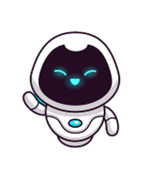

# Installing and loading required packages

In [1]:
# !pip install selenium
# !pip install webdriver_manager
# !pip install pypiwin32
# !pip install --upgrade holidays

import getpass
import time
import os 
import datetime
import win32com.client as win32
import holidays
import glob
import datetime as dt
import json
import shutil

from datetime import datetime, timedelta
from win32com.client import Dispatch
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from win32com.shell import shell, shellcon
from win32com.client import Dispatch
from IPython import get_ipython;   

options = webdriver.ChromeOptions()
options.add_argument("--headless")

browser =webdriver.Chrome()
browser.maximize_window()
browser.switch_to.window(browser.window_handles[0])

appState = {
     "recentDestinations": [
         {
             "id": "Save as PDF",
             "origin": "local",
             "account": ""
         }
     ],
     "selectedDestinationId": "Save as PDF",
     "version": 2
}

profile = {'printing.print_preview_sticky_settings.appState': 
json.dumps(appState),
            'savefile.default_directory': '//trdecomsrv/H/Alphie/Temp',
           "download.default_directory": r'\\trdecomsrv\H\Alphie\Temp'}

chrome_options = webdriver.ChromeOptions() 
chrome_options.add_experimental_option('prefs', profile)
chrome_options.add_argument('--kiosk-printing')

browser = webdriver.Chrome(options=chrome_options)


# Creating output folder

In [2]:
today = datetime.now()

os.mkdir("//Trdecomsrv/H/Alphie/" + today.strftime('%Y-%b-%d at %Hh-%Mm-%Ss') +' ' + 'by' + ' ' + os.getlogin())
folder_path = "//Trdecomsrv/H/Alphie/"
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
destination_folder = (files[0])

# Providing login credentials

In [3]:
my_login = getpass.getpass("Please type your GenTax login id:\n")

Please type your GenTax login id:
 ········


In [4]:
my_password = getpass.getpass("Please type your GenTax password:\n")

Please type your GenTax password:
 ········


In [5]:
url = 'https://gentaxprod.trd.state.nm.us/GenTax/dPWmgh2N/#1'
browser.get(url)
browser.maximize_window()

In [6]:
time.sleep(2)
username_el = browser.find_element("name", "Dc-c")
username_el.send_keys(my_login)

In [7]:
password_el = browser.find_element("name", "Dc-d")
password_el.send_keys(my_password)

# Clicking the logon button

In [8]:
time.sleep(1.5)
submit_btn_el = browser.find_element("css selector", "[class='ButtonCaptionText']")

In [9]:
submit_btn_el.click()

# Clicking the Report button

In [10]:
time.sleep(1.5)
Report_btn_el = browser.find_element("id", "l_Dd-1-16")
Report_btn_el.click()

# Clicking the Generate Report button

In [11]:
time.sleep(1.5)
Generate_Report_btn_el = browser.find_element("id", "l_Dc-1-4")
Generate_Report_btn_el.click()

# Searching Fuel reports

In [12]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)
input_field_el = browser.find_element("id", "Dc-h")
input_field_el.send_keys("Fuels report")
input_field_el.send_keys(Keys.ENTER)    

## Fuels Report (Ethanol Section)

### Clicking thr Generate Report button

In [13]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-73")
Generate_btn_el.click()

### Defining Begining_RA

In [14]:
now = dt.datetime.now()

begining_month_closing_day = 10
begining_month = now.month -1
year = now.year
begining_month_closing = dt.datetime (year, begining_month, begining_month_closing_day)
print(begining_month_closing)

ONE_DAY = dt.timedelta(days=1)

TWO_DAY = dt.timedelta(days=2)
HOLIDAYS_US = holidays.US()

def next_business_day():
    next_day = begining_month_closing + TWO_DAY
    while next_day.weekday() in holidays.WEEKEND or next_day in HOLIDAYS_US:
        next_day += TWO_DAY
    return next_day;

Begin_RA = next_business_day()
Begin_RA = Begin_RA.strftime("%d-%b-%Y")
print(Begin_RA)

2023-11-10 00:00:00
14-Nov-2023


### Defining End_RA

In [15]:
ending_month_closing_day = 10
ending_month = now.month 

ending_month_closing = dt.datetime (year, ending_month, ending_month_closing_day)
print(ending_month_closing)

def next_business_day():
    next_day = ending_month_closing + ONE_DAY
    while next_day.weekday() in holidays.WEEKEND or next_day in HOLIDAYS_US:
        next_day += ONE_DAY
    return next_day;

End_RA = next_business_day()
End_RA = End_RA.strftime("%d-%b-%Y")
print(End_RA)

2023-12-10 00:00:00
11-Dec-2023


### Inputing dates

In [16]:
time.sleep(1)
Begin_RA_el = browser.find_element("id", "Dg-2")
Begin_RA_el.send_keys(Begin_RA)
Begin_RA_el.send_keys(Keys.ENTER)

In [17]:
time.sleep(1)
End_RA_el = browser.find_element("id", "Dg-3")
End_RA_el.send_keys(End_RA)
End_RA_el.send_keys(Keys.ENTER)

### Clicking Generate button

In [18]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()
time.sleep(5)

### Clicking Export to excel button

In [19]:
try:
    Export_to_excel_el = browser.find_element("id", "Dc-9")
    Export_to_excel_el.click()
except StaleElementReferenceException:
    time.sleep(5)
    Export_to_excel_el = browser.find_element("id", "Dc-9")
    Export_to_excel_el.click()

In [20]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [21]:
last_file

'\\\\trdecomsrv\\H\\Alphie\\Temp\\845780992.xls'

In [22]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [23]:
file_name

'845780992'

In [24]:
import shutil
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".xls"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, ("eth" + " " +Begin_RA + " " + "to" + " " + End_RA + ".xls"))

try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file);


### Creating email attachment

In [25]:
fuel_reprt_email_item_1 = new_file

### Close the report

In [26]:
time.sleep(5)
close_button_el = browser.find_elements(By.XPATH, "//button")

try:
    for button in close_button_el:
        if button.get_attribute('title') and 'Close Manager: Fuels Report (Ethanol Section)' in button.get_attribute('title'):
            button.click();
except StaleElementReferenceException:
    time.sleep(5)
    for button in close_button_el:
        if button.get_attribute('title') and 'Close Manager: Fuels Report (Ethanol Section)' in button.get_attribute('title'):
            button.click();
        

## Fuels Report (Gasoline Section)

### Clicking thr Generate Report button

In [27]:
options.add_experimental_option("prefs", {
  "download.default_directory": r'\\trdecomsrv\H\Alphie\Temp'
  })

time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-36")
Generate_btn_el.click()

### Inputing dates

In [28]:
time.sleep(1)
Begin_RA_el = browser.find_element("id", "Dg-2")
Begin_RA_el.send_keys(Begin_RA)
Begin_RA_el.send_keys(Keys.ENTER)

In [29]:
time.sleep(1)
End_RA_el = browser.find_element("id", "Dg-3")
End_RA_el.send_keys(End_RA)
End_RA_el.send_keys(Keys.ENTER)

### Clicking Generate button

In [30]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()
time.sleep(5)

### Clicking Export to excel button

In [31]:
Export_to_excel_el = browser.find_element("id", "Dc-9")
Export_to_excel_el.click()
time.sleep(5)

In [32]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [33]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [34]:
file_name

'1635948544'

In [35]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".xls"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, ("gas" + " " +Begin_RA + " " + "to" + " " + End_RA + ".xls"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file);


### Creating email attachment

In [36]:
fuel_reprt_email_item_2 = new_file

### Close the report

In [37]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")


for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: Fuels Report (Gasoline Section)' in button.get_attribute('title'):
        button.click();
        

## Fuels Report (Diesel Section)

### Clicking thr Generate Report button

In [38]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-156")
Generate_btn_el.click()

### Inputing dates

In [39]:
time.sleep(1)
Begin_RA_el = browser.find_element("id", "Dg-2")
Begin_RA_el.send_keys(Begin_RA)
Begin_RA_el.send_keys(Keys.ENTER)

In [40]:
time.sleep(1)
End_RA_el = browser.find_element("id", "Dg-3")
End_RA_el.send_keys(End_RA)
End_RA_el.send_keys(Keys.ENTER)

### Clicking Generate button

In [41]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()
time.sleep(5)

### Clicking Export to excel button

In [42]:
Export_to_excel_el = browser.find_element("id", "Dc-9")
Export_to_excel_el.click()
time.sleep(5)

In [43]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [44]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [45]:
file_name

'20027392'

In [46]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".xls"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, ("spf" + " " +Begin_RA + " " + "to" + " " + End_RA + ".xls"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file);


### Creating email attachment

In [47]:
fuel_reprt_email_item_3 = new_file

### Close the report

In [48]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")


for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: Fuels Report (Diesel Section)' in button.get_attribute('title'):
        button.click();
        

## Fuels Report _CFT & I

### Clicking thr Generate Report button

In [49]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-99")
Generate_btn_el.click()

### Inputing dates

In [50]:
time.sleep(1)
Begin_RA_el = browser.find_element("id", "Dg-2")
Begin_RA_el.send_keys(Begin_RA)
Begin_RA_el.send_keys(Keys.ENTER)

In [51]:
time.sleep(1)
End_RA_el = browser.find_element("id", "Dg-3")
End_RA_el.send_keys(End_RA)
End_RA_el.send_keys(Keys.ENTER)

### Clicking Generate button

In [52]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()
time.sleep(20)

### Clicking Export to excel button

In [53]:
delay = 60 # seconds
try:
    Export_to_excel_el = WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.ID, 'Dc-9')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")
time.sleep(3)
try: 
    Export_to_excel_el = browser.find_element("id", "Dc-9")
    Export_to_excel_el.click()
except ElementNotInteractableException:
    time.sleep(30)
    Export_to_excel_el = browser.find_element("id", "Dc-9")
    Export_to_excel_el.click()
    
time.sleep(5)

Page is ready!


In [54]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [55]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [56]:
file_name

'885626880'

In [57]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".xls"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, ("pi" + " " +Begin_RA + " " + "to" + " " + End_RA + ".xls"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file);


### Creating email attachment

In [58]:
fuel_reprt_email_item_4 = new_file

### Close the report

In [59]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")


for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: Fuels Report _CFT P &amp;  I' in button.get_attribute('title'):
        button.click();
        

# Searching Alternative Fuel Volumes reports

In [60]:
time.sleep(5)
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(5)

input_field_el = browser.find_element("id", "Dc-h")
input_field_el.send_keys("Alternative Fuel Volumes")
input_field_el.send_keys(Keys.ENTER)
    

## Clicking Generate button

In [61]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-52")
Generate_btn_el.click()

## Inputing dates

In [62]:
time.sleep(1)
Begin_RA_el = browser.find_element("id", "Dg-2")
Begin_RA_el.send_keys(Begin_RA)
Begin_RA_el.send_keys(Keys.ENTER)

In [63]:
time.sleep(1)
End_RA_el = browser.find_element("id", "Dg-3")
End_RA_el.send_keys(End_RA)
End_RA_el.send_keys(Keys.ENTER)

## Clicking Generate button

In [64]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()
time.sleep(10)

## Clicking Export to excel button

In [65]:
Export_to_excel_el = browser.find_element("id", "Dc-9")
Export_to_excel_el.click()
time.sleep(5)

In [66]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [67]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [68]:
file_name

'50894848'

In [69]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".xls"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, ("alt" + " " +Begin_RA + " " + "to" + " " + End_RA + ".xls"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file);


## Creating email attachment

In [70]:
fuel_reprt_email_item_5 = new_file

## Close the report

In [71]:
browser.switch_to.window(browser.window_handles[0])
time.sleep(2)

close_button_el = browser.find_elements(By.XPATH, "//button")


for button in close_button_el:
    if button.get_attribute('title') and 'Alternative Fuel Volumes' in button.get_attribute('title'):
        button.click();

In [72]:
time.sleep(1.5)
close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Group: Generate Report' in button.get_attribute('title'):
        button.click();

time.sleep(1.5)
Generate_Report_btn_el = browser.find_element("id", "l_Dc-1-4")
Generate_Report_btn_el.click()

# Searching CFT Locations reports

In [73]:
browser.switch_to.window(browser.window_handles[0])
time.sleep(1.5)

input_field_el = browser.find_element("id", "Dc-h")
input_field_el.send_keys("CFT Locations")
input_field_el.send_keys(Keys.ENTER)


## Clicking Generate button

In [74]:
time.sleep(3)

try:
  Generate_btn_el = browser.find_element("id", "l_Dc-6-365")
  Generate_btn_el.click()
except NoSuchElementException:
  Generate_btn_el = browser.find_element("id", "l_Dc-6-366")
  Generate_btn_el.click();
        
# Generate_btn_el = browser.find_element("id", "l_Dc-6-365")
# Generate_btn_el.click()

## Defining Begining_RA

In [75]:
now = dt.datetime.now()

begining_month_closing_day = 1
begining_month = now.month -2
year = now.year
begining_month_closing = dt.datetime (year, begining_month, begining_month_closing_day)

Begin_RA = begining_month_closing.strftime("%d-%b-%Y")
print(Begin_RA)

01-Oct-2023


## Defining End_RA

In [76]:
input_dt = dt.datetime.now()
print("The original date is:", input_dt.date())

from datetime import datetime, timedelta

last_month = input_dt.replace(day=28) - timedelta(days=32)
res = last_month - timedelta(days=last_month.day)
End_RA = res.strftime("%d-%b-%Y")
print(End_RA)

The original date is: 2023-12-04
31-Oct-2023


## Inputing dates

In [77]:
time.sleep(1)
Begin_RA_el = browser.find_element("id", "Dk-7")
Begin_RA_el.send_keys(Begin_RA)
Begin_RA_el.send_keys(Keys.ENTER)

In [78]:
time.sleep(1)
End_RA_el = browser.find_element("id", "Dk-8")
End_RA_el.send_keys(End_RA)
End_RA_el.send_keys(Keys.ENTER)
time.sleep(1)

In [79]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")
for button in close_button_el:
    if button.get_attribute('class') and 'FastMessageBoxButtonYes ui-button ui-corner-all ui-widget' in button.get_attribute('class'):
        button.click();

## Clicking Cube button

In [80]:
browser.switch_to.window(browser.window_handles[0])
time.sleep(5)

Cube_btn_el = browser.find_element("id", "cl_Dh-a")
Cube_btn_el.click()


## Clicking radio button

In [81]:
time.sleep(7)

radio_btn_el = browser.find_element("id", "cl_Df-g")
radio_btn_el.click();

## Clicking Spreadsheet button

In [82]:
time.sleep(5)

Spreadsheet_btn_el = browser.find_element("id", "l_Df_1-l-3")
Spreadsheet_btn_el.click()

In [83]:
time.sleep(3)
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [84]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [85]:
file_name

'Exported 202312040924'

In [86]:
today = dt.date.today()
first = today.replace(day=1)
accrue_month_1 = first - dt.timedelta(days=25)
accrue_month_2 = first - dt.timedelta(days=32)
print(accrue_month_1.strftime("%Y-%b"))
print(accrue_month_2.strftime("%Y-%b"))

time.sleep(3)
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".ods"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder,  accrue_month_2.strftime("Gasoline Gallons by Locations" + " " + "%Y-%m.xls"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file);


2023-Nov
2023-Oct


## Creating email attachment

In [87]:
fuel_reprt_email_item_6 = new_file

## Close the report

In [88]:
browser.switch_to.window(browser.window_handles[0])
time.sleep(2)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: CFT Locations' in button.get_attribute('title'):
        button.click();

# Working on GL Backend RA - Main report

## Searching GL Backend RA - Main report

In [89]:
browser.switch_to.window(browser.window_handles[0])
time.sleep(3)

input_field_el = browser.find_element("id", "Dc-h")
input_field_el.send_keys("GL Backend RA - Main")
input_field_el.send_keys(Keys.ENTER)


## Clicking Generate button

In [90]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-166")
Generate_btn_el.click()

# CIT

## Selecting CIT

In [91]:
time.sleep(1.5)
Revenue_Group_el = browser.find_element("name", "Dg-2")
Revenue_Group_el.send_keys("CIT")
Revenue_Group_el.send_keys(Keys.ENTER)

## Clicking the Generate button

In [92]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()


## Clicking the View Report button

In [93]:
delay = 10 # seconds
try:
    myElem = WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.ID, 'IC_Dc-8')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")
     
View_Report_el = browser.find_element("id", "Dc-8")

View_Report_el.click()
time.sleep(1.5)

browser.switch_to.window(browser.window_handles[1])

browser.execute_script('window.print();')
time.sleep(3)
browser.close()

Loading took too much time!


## Close the report

In [94]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")


for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: GL Backend RA - Main' in button.get_attribute('title'):
        button.click();
        
    

## Renaming and moving the report

In [95]:
today = dt.date.today()
first = today.replace(day=1)
accrue_month_1 = first - dt.timedelta(days=25)
accrue_month_2 = first - dt.timedelta(days=32)
print(accrue_month_1.strftime("%Y-%b"))
print(accrue_month_2.strftime("%Y-%b"))

2023-Nov
2023-Oct


In [96]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [97]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [98]:
file_name

'vRBID0aMihniRZxqhUvrBw__'

In [99]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".pdf"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, accrue_month_1.strftime("CIT-Prelim. %b %Y Reporting Generic Distribution Report.pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)


In [100]:
# file name with extension
file_name = os.path.basename(new_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [101]:
old_file = os.path.join(destination_folder, new_file)
new_file = os.path.join(destination_folder, accrue_month_2.strftime(file_name + ' ' + "(%b %Y Accrual).pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

## Creating Email attachment

In [102]:
cit_email_item_1 = new_file

# OGP-R

## Clicking Generate button

In [103]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-166")
Generate_btn_el.click()

## Selecting OGP-R

In [104]:
time.sleep(3)
Revenue_Group_el = browser.find_element("name", "Dg-2")
Revenue_Group_el.send_keys("OGP-R")
Revenue_Group_el.send_keys(Keys.ENTER)

## Clicking the Generate button

In [105]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()

## Clicking the View Report button

In [106]:
delay = 3 # seconds
try:
    myElem = WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.ID, 'Dc-8')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")
time.sleep(10)     

try:
    View_Report_el = browser.find_element("id", "Dc-8")
    View_Report_el.click()
    time.sleep(1.5)
except StaleElementReferenceException:
    time.sleep(30)
    View_Report_el = browser.find_element("id", "Dc-8")
    View_Report_el.click()
    time.sleep(1.5)

   
browser.switch_to.window(browser.window_handles[1])

browser.execute_script('window.print();')
time.sleep(3)
browser.close()

Page is ready!


## Close the report

In [107]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: GL Backend RA - Main' in button.get_attribute('title'):
        button.click();
        

## Renaming and moving the report

In [108]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [109]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [110]:
file_name

'MbFtSzOfNBifoy_H7v9v8g__'

In [111]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".pdf"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, accrue_month_1.strftime("OGP-R-Prelim. %b %Y Reporting Generic Distribution Report.pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)


In [112]:
# file name with extension
file_name = os.path.basename(new_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [113]:
old_file = os.path.join(destination_folder, new_file)
new_file = os.path.join(destination_folder, accrue_month_2.strftime(file_name + ' ' + "(%b %Y Accrual).pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

## Creating Email attachment

In [114]:
ogp_r_email_item_1 = new_file

# PIT

## Clicking Generate button

In [115]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-166")
Generate_btn_el.click()

## Selecting PIT

In [116]:
time.sleep(3)
Revenue_Group_el = browser.find_element("name", "Dg-2")
Revenue_Group_el.send_keys("PIT")
Revenue_Group_el.send_keys(Keys.ENTER)

## Clicking the Generate button

In [117]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()

## Clicking the View Report button

In [118]:
delay = 3 # seconds
try:
    myElem = WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.ID, 'Dc-8')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")
time.sleep(10)     
View_Report_el = browser.find_element("id", "Dc-8")

View_Report_el.click()
time.sleep(1.5)

browser.switch_to.window(browser.window_handles[1])

browser.execute_script('window.print();')
time.sleep(3)
browser.close()

Page is ready!


StaleElementReferenceException: Message: stale element reference: stale element not found
  (Session info: chrome=119.0.6045.200); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#stale-element-reference-exception
Stacktrace:
	GetHandleVerifier [0x00007FF6134C82B2+55298]
	(No symbol) [0x00007FF613435E02]
	(No symbol) [0x00007FF6132F05AB]
	(No symbol) [0x00007FF6132F509C]
	(No symbol) [0x00007FF6132F6FDF]
	(No symbol) [0x00007FF6132F70D0]
	(No symbol) [0x00007FF61333358E]
	(No symbol) [0x00007FF613332AA8]
	(No symbol) [0x00007FF6133287BF]
	(No symbol) [0x00007FF6133520AA]
	(No symbol) [0x00007FF6133280CF]
	(No symbol) [0x00007FF6133522C0]
	(No symbol) [0x00007FF61336AAA4]
	(No symbol) [0x00007FF613351E83]
	(No symbol) [0x00007FF61332670A]
	(No symbol) [0x00007FF613327964]
	GetHandleVerifier [0x00007FF613840AAB+3694587]
	GetHandleVerifier [0x00007FF61389728E+4048862]
	GetHandleVerifier [0x00007FF61388F173+4015811]
	GetHandleVerifier [0x00007FF6135647D6+695590]
	(No symbol) [0x00007FF613440CE8]
	(No symbol) [0x00007FF61343CF34]
	(No symbol) [0x00007FF61343D062]
	(No symbol) [0x00007FF61342D3A3]
	BaseThreadInitThunk [0x00007FFA9BA526AD+29]
	RtlUserThreadStart [0x00007FFA9CBCA9F8+40]


## Close the report

In [ ]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: GL Backend RA - Main' in button.get_attribute('title'):
        button.click();
        

## Renaming and moving the report

In [ ]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [ ]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [ ]:
file_name

In [ ]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".pdf"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, accrue_month_1.strftime("PIT-Prelim. %b %Y Reporting Generic Distribution Report.pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)


In [ ]:
# file name with extension
file_name = os.path.basename(new_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [ ]:
old_file = os.path.join(destination_folder, new_file)
new_file = os.path.join(destination_folder, accrue_month_2.strftime(file_name + ' ' + "(%b %Y Accrual).pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

## Creating Email attachment

In [ ]:
pit_email_item_1 = new_file

# PTW-O

## Clicking Generate button

In [ ]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-166")
Generate_btn_el.click()

## Selecting PTW-O

In [ ]:
time.sleep(3)
Revenue_Group_el = browser.find_element("name", "Dg-2")
Revenue_Group_el.send_keys("PTW-O")
Revenue_Group_el.send_keys(Keys.ENTER)

## Clicking the Generate button

In [ ]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()

## Clicking the View Report button

In [ ]:
delay = 10 # seconds
try:
    myElem = WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.ID, 'Dc-8')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")
time.sleep(10)     

try:
    View_Report_el = browser.find_element("id", "Dc-8")
    View_Report_el.click()
    time.sleep(1.5)
except StaleElementReferenceException:
    time.sleep(60)
    View_Report_el = browser.find_element("id", "Dc-8")
    View_Report_el.click()
    time.sleep(1.5)
    
browser.switch_to.window(browser.window_handles[1])

browser.execute_script('window.print();')
time.sleep(3)
browser.close()

## Close the report

In [ ]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: GL Backend RA - Main' in button.get_attribute('title'):
        button.click();
        

## Renaming and moving the report

In [ ]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [ ]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [ ]:
file_name

In [ ]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".pdf"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, accrue_month_1.strftime("PTW-O-Prelim. %b %Y Reporting Generic Distribution Report.pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)


In [ ]:
# file name with extension
file_name = os.path.basename(new_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [ ]:
old_file = os.path.join(destination_folder, new_file)
new_file = os.path.join(destination_folder, accrue_month_2.strftime(file_name + ' ' + "(%b %Y Accrual).pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

## Creating Email attachment

In [ ]:
ptw_o_email_item_1 = new_file

# PTW-R

## Clicking Generate button

In [ ]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-166")
Generate_btn_el.click()

## Selecting PTW-R

In [ ]:
time.sleep(3)
Revenue_Group_el = browser.find_element("name", "Dg-2")
Revenue_Group_el.send_keys("PTW-R")
Revenue_Group_el.send_keys(Keys.ENTER)

## Clicking the Generate button

In [ ]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()

## Clicking the View Report button

In [ ]:
delay = 3 # seconds
try:
    myElem = WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.ID, 'Dc-8')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")
time.sleep(10)     
View_Report_el = browser.find_element("id", "Dc-8")

View_Report_el.click()
time.sleep(1.5)

browser.switch_to.window(browser.window_handles[1])

browser.execute_script('window.print();')
time.sleep(3)
browser.close()

## Close the report

In [ ]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: GL Backend RA - Main' in button.get_attribute('title'):
        button.click();
        

## Renaming and moving the report

In [ ]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [ ]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [ ]:
file_name

In [ ]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".pdf"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, accrue_month_1.strftime("PTW-R-Prelim. %b %Y Reporting Generic Distribution Report.pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)


In [ ]:
# file name with extension
file_name = os.path.basename(new_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [ ]:
old_file = os.path.join(destination_folder, new_file)
new_file = os.path.join(destination_folder, accrue_month_2.strftime(file_name + ' ' + "(%b %Y Accrual).pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

## Creating Email attachment

In [ ]:
ptw_r_email_item_1 = new_file

# WWT

## Clicking Generate button

In [ ]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-166")
Generate_btn_el.click()

## Selecting WWT

In [ ]:
time.sleep(5)
Revenue_Group_el = browser.find_element("name", "Dg-2")
Revenue_Group_el.send_keys("WWT")
Revenue_Group_el.send_keys(Keys.ENTER)

## Clicking the Generate button

In [ ]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()

## Clicking the View Report button

In [ ]:
delay = 10 # seconds
try:
    myElem = WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.ID, 'Dc-8')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")
time.sleep(10)     
View_Report_el = browser.find_element("id", "Dc-8")

View_Report_el.click()
time.sleep(1.5)

browser.switch_to.window(browser.window_handles[1])

browser.execute_script('window.print();')
time.sleep(3)
browser.close()

## Close the report

In [ ]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: GL Backend RA - Main' in button.get_attribute('title'):
        button.click();
        

## Renaming and moving the report

In [ ]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [ ]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [ ]:
file_name

In [ ]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".pdf"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, accrue_month_1.strftime("WWT-Prelim. %b %Y Reporting Generic Distribution Report.pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)


In [ ]:
# file name with extension
file_name = os.path.basename(new_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [ ]:
old_file = os.path.join(destination_folder, new_file)
new_file = os.path.join(destination_folder, accrue_month_2.strftime(file_name + ' ' + "(%b %Y Accrual).pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

## Creating Email attachment

In [ ]:
wwt_email_item_1 = new_file

# FID

## Clicking Generate button

In [ ]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-166")
Generate_btn_el.click()

## Selecting FID

In [ ]:
time.sleep(5)
Revenue_Group_el = browser.find_element("name", "Dg-2")
Revenue_Group_el.send_keys("FID")
Revenue_Group_el.send_keys(Keys.ENTER)

## Clicking the Generate button

In [ ]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()

## Clicking the View Report button

In [ ]:
delay = 10 # seconds
try:
    myElem = WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.ID, 'Dc-8')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")
time.sleep(10)     
View_Report_el = browser.find_element("id", "Dc-8")

View_Report_el.click()
time.sleep(1.5)

browser.switch_to.window(browser.window_handles[1])

browser.execute_script('window.print();')
time.sleep(3)
browser.close()

## Close the report

In [ ]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: GL Backend RA - Main' in button.get_attribute('title'):
        button.click();
        

## Renaming and moving the report

In [ ]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [ ]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [ ]:
file_name

In [ ]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".pdf"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, accrue_month_1.strftime("FID-Prelim. %b %Y Reporting Generic Distribution Report.pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)


In [ ]:
# file name with extension
file_name = os.path.basename(new_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [ ]:
old_file = os.path.join(destination_folder, new_file)
new_file = os.path.join(destination_folder, accrue_month_2.strftime(file_name + ' ' + "(%b %Y Accrual).pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

## Creating Email attachment

In [ ]:
fid_email_item_1 = new_file

# NWT

## Clicking Generate button

In [ ]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-166")
Generate_btn_el.click()

## Selecting NWT

In [ ]:
time.sleep(5)
Revenue_Group_el = browser.find_element("name", "Dg-2")
Revenue_Group_el.send_keys("NWT")
Revenue_Group_el.send_keys(Keys.ENTER)

## Clicking the Generate button

In [ ]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()

## Clicking the View Report button

In [ ]:
delay = 10 # seconds
try:
    myElem = WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.ID, 'Dc-8')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")
time.sleep(10)     
View_Report_el = browser.find_element("id", "Dc-8")

View_Report_el.click()
time.sleep(1.5)

browser.switch_to.window(browser.window_handles[1])

browser.execute_script('window.print();')
time.sleep(3)
browser.close()

## Close the report

In [ ]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: GL Backend RA - Main' in button.get_attribute('title'):
        button.click();
        

## Renaming and moving the report

In [ ]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [ ]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [ ]:
file_name

In [ ]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".pdf"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, accrue_month_1.strftime("NWT-Prelim. %b %Y Reporting Generic Distribution Report.pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)


In [ ]:
# file name with extension
file_name = os.path.basename(new_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [ ]:
old_file = os.path.join(destination_folder, new_file)
new_file = os.path.join(destination_folder, accrue_month_2.strftime(file_name + ' ' + "(%b %Y Accrual).pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

## Creating Email attachment

In [ ]:
nwt_email_item_1 = new_file

# OGP

## Clicking Generate button

In [ ]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-166")
Generate_btn_el.click()

## Selecting OGP

In [ ]:
time.sleep(5)
Revenue_Group_el = browser.find_element("name", "Dg-2")
Revenue_Group_el.send_keys("OGP")
Revenue_Group_el.send_keys(Keys.ENTER)

## Clicking the Generate button

In [ ]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()

## Clicking the View Report button

In [ ]:
delay = 10 # seconds
try:
    myElem = WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.ID, 'Dc-8')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")
time.sleep(10)     
View_Report_el = browser.find_element("id", "Dc-8")

View_Report_el.click()
time.sleep(1.5)

browser.switch_to.window(browser.window_handles[1])

browser.execute_script('window.print();')
time.sleep(3)
browser.close()

## Close the report

In [ ]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: GL Backend RA - Main' in button.get_attribute('title'):
        button.click();
        

## Renaming and moving the report

In [ ]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [ ]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [ ]:
file_name

In [ ]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".pdf"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, accrue_month_1.strftime("OGP-Prelim. %b %Y Reporting Generic Distribution Report.pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)


In [ ]:
# file name with extension
file_name = os.path.basename(new_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [ ]:
old_file = os.path.join(destination_folder, new_file)
new_file = os.path.join(destination_folder, accrue_month_2.strftime(file_name + ' ' + "(%b %Y Accrual).pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

## Creating Email attachment

In [ ]:
ogp_email_item_1 = new_file

# OGP-O

## Clicking Generate button

In [ ]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-166")
Generate_btn_el.click()

## Selecting OGP-O

In [ ]:
time.sleep(5)
Revenue_Group_el = browser.find_element("name", "Dg-2")
Revenue_Group_el.send_keys("OGP-O")
Revenue_Group_el.send_keys(Keys.ENTER)

## Clicking the Generate button

In [ ]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()

## Clicking the View Report button

In [ ]:
delay = 10 # seconds
try:
    myElem = WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.ID, 'Dc-8')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")
time.sleep(10)     

try:
    View_Report_el = browser.find_element("id", "Dc-8")
    View_Report_el.click()
    time.sleep(1.5)
except StaleElementReferenceException:
    time.sleep(60)
    View_Report_el = browser.find_element("id", "Dc-8")
    View_Report_el.click()
    time.sleep(1.5)

browser.switch_to.window(browser.window_handles[1])

browser.execute_script('window.print();')
time.sleep(3)
browser.close()

## Close the report

In [ ]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: GL Backend RA - Main' in button.get_attribute('title'):
        button.click();
        

## Renaming and moving the report

In [ ]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [ ]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [ ]:
file_name

In [ ]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".pdf"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, accrue_month_1.strftime("OGP-O-Prelim. %b %Y Reporting Generic Distribution Report.pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)


In [ ]:
# file name with extension
file_name = os.path.basename(new_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [ ]:
old_file = os.path.join(destination_folder, new_file)
new_file = os.path.join(destination_folder, accrue_month_2.strftime(file_name + ' ' + "(%b %Y Accrual).pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

## Creating Email attachment

In [ ]:
ogp_o_email_item_1 = new_file

# CAN

## Clicking Generate button

In [ ]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-166")
Generate_btn_el.click()

## Selecting CAN

In [ ]:
time.sleep(5)
Revenue_Group_el = browser.find_element("name", "Dg-2")
Revenue_Group_el.send_keys("CAN")
Revenue_Group_el.send_keys(Keys.ENTER)

## Clicking the Generate button

In [ ]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()

## Clicking the View Report button

In [ ]:
delay = 10 # seconds
try:
    myElem = WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.ID, 'Dc-8')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")
time.sleep(10)     
View_Report_el = browser.find_element("id", "Dc-8")

View_Report_el.click()
time.sleep(1.5)

browser.switch_to.window(browser.window_handles[1])

browser.execute_script('window.print();')
time.sleep(3)
browser.close()

## Close the report

In [ ]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: GL Backend RA - Main' in button.get_attribute('title'):
        button.click();
        

## Renaming and moving the report

In [ ]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [ ]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [ ]:
file_name

In [ ]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".pdf"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, accrue_month_1.strftime("CAN-Prelim. %b %Y Reporting Generic Distribution Report.pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)


In [ ]:
# file name with extension
file_name = os.path.basename(new_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [ ]:
old_file = os.path.join(destination_folder, new_file)
new_file = os.path.join(destination_folder, accrue_month_2.strftime(file_name + ' ' + "(%b %Y Accrual).pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

## Creating Email attachment

In [ ]:
can_email_item_1 = new_file

# GRT

## Clicking Generate button

In [ ]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-166")
Generate_btn_el.click()

## Selecting GRT

In [ ]:
time.sleep(5)
Revenue_Group_el = browser.find_element("name", "Dg-2")
Revenue_Group_el.send_keys("GRT")
Revenue_Group_el.send_keys(Keys.ENTER)

## Clicking the Generate button

In [ ]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()

## Clicking the View Report button

In [ ]:
delay = 10 # seconds
try:
    myElem = WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.ID, 'Dc-8')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")
time.sleep(10)

View_Report_el = browser.find_element("id", "Dc-8")
try:
    View_Report_el.click()
    time.sleep(1.5)
except ElementNotInteractableException:
    time.sleep(120)
    View_Report_el.click()
    time.sleep(1.5)
    
browser.switch_to.window(browser.window_handles[1])

browser.execute_script('window.print();')
time.sleep(3)
browser.close()

## Close the report

In [ ]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: GL Backend RA - Main' in button.get_attribute('title'):
        button.click();
        

## Renaming and moving the report

In [ ]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [ ]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [ ]:
file_name

In [ ]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".pdf"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, accrue_month_1.strftime("GRT-Prelim. %b %Y Reporting Generic Distribution Report.pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)


In [ ]:
# file name with extension
file_name = os.path.basename(new_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [ ]:
old_file = os.path.join(destination_folder, new_file)
new_file = os.path.join(destination_folder, accrue_month_2.strftime(file_name + ' ' + "(%b %Y Accrual).pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

## Creating Email attachment

In [ ]:
grt_email_item_1 = new_file

# CMP

## Clicking Generate button

In [ ]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-166")
Generate_btn_el.click()

## Selecting CMP

In [ ]:
time.sleep(5)
Revenue_Group_el = browser.find_element("name", "Dg-2")
Revenue_Group_el.send_keys("CMP")
Revenue_Group_el.send_keys(Keys.ENTER)

## Clicking the Generate button

In [ ]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()

## Clicking the View Report button

In [ ]:
delay = 10 # seconds
try:
    myElem = WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.ID, 'Dc-8')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")
time.sleep(10)     

try:
    View_Report_el = browser.find_element("id", "Dc-8")
    View_Report_el.click()
    time.sleep(1.5)
    
except StaleElementReferenceException:
    time.sleep(120)
    View_Report_el = browser.find_element("id", "Dc-8")
    View_Report_el.click()
    time.sleep(1.5)

browser.switch_to.window(browser.window_handles[1])

browser.execute_script('window.print();')
time.sleep(3)
browser.close()

## Close the report

In [ ]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: GL Backend RA - Main' in button.get_attribute('title'):
        button.click();
        

## Renaming and moving the report

In [ ]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [ ]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [ ]:
file_name

In [ ]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".pdf"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, accrue_month_1.strftime("CMP-Prelim. %b %Y Reporting Generic Distribution Report.pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)


In [ ]:
# file name with extension
file_name = os.path.basename(new_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [ ]:
old_file = os.path.join(destination_folder, new_file)
new_file = os.path.join(destination_folder, accrue_month_2.strftime(file_name + ' ' + "(%b %Y Accrual).pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

## Creating Email attachment

In [ ]:
cmp_email_item_1 = new_file

# ISI

## Clicking Generate button

In [ ]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-166")
Generate_btn_el.click()

## Selecting ISI

In [ ]:
time.sleep(5)
Revenue_Group_el = browser.find_element("name", "Dg-2")
Revenue_Group_el.send_keys("ISI")
Revenue_Group_el.send_keys(Keys.ENTER)

## Clicking the Generate button

In [ ]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()

## Clicking the View Report button

In [ ]:
delay = 10 # seconds
try:
    myElem = WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.ID, 'Dc-8')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")
time.sleep(10)     
View_Report_el = browser.find_element("id", "Dc-8")

View_Report_el.click()
time.sleep(1.5)

browser.switch_to.window(browser.window_handles[1])

browser.execute_script('window.print();')
time.sleep(3)
browser.close()

## Close the report

In [ ]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: GL Backend RA - Main' in button.get_attribute('title'):
        button.click();
        

## Renaming and moving the report

In [ ]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [ ]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [ ]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".pdf"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, accrue_month_1.strftime("ISI-Prelim. %b %Y Reporting Generic Distribution Report.pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)


In [ ]:
# file name with extension
file_name = os.path.basename(new_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [ ]:
old_file = os.path.join(destination_folder, new_file)
new_file = os.path.join(destination_folder, accrue_month_2.strftime(file_name + ' ' + "(%b %Y Accrual).pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

## Creating Email attachment

In [ ]:
isi_email_item_1 = new_file

# IPP

## Clicking Generate button

In [ ]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-166")
Generate_btn_el.click()

## Selecting IPP

In [ ]:
time.sleep(5)
Revenue_Group_el = browser.find_element("name", "Dg-2")
Revenue_Group_el.send_keys("IPP")
Revenue_Group_el.send_keys(Keys.ENTER)

## Clicking the Generate button

In [ ]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()

## Clicking the View Report button

In [ ]:
delay = 10 # seconds
try:
    myElem = WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.ID, 'Dc-8')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")
time.sleep(10)     
View_Report_el = browser.find_element("id", "Dc-8")

View_Report_el.click()
time.sleep(1.5)

browser.switch_to.window(browser.window_handles[1])

browser.execute_script('window.print();')
time.sleep(3)
browser.close()

## Close the report

In [ ]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: GL Backend RA - Main' in button.get_attribute('title'):
        button.click();
        

## Renaming and moving the report

In [ ]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [ ]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [ ]:
file_name

In [ ]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".pdf"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, accrue_month_1.strftime("IPP-Prelim. %b %Y Reporting Generic Distribution Report.pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)


In [ ]:
# file name with extension
file_name = os.path.basename(new_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [ ]:
old_file = os.path.join(destination_folder, new_file)
new_file = os.path.join(destination_folder, accrue_month_2.strftime(file_name + ' ' + "(%b %Y Accrual).pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

## Creating Email attachment

In [ ]:
ipp_email_item_1 = new_file

# IPS

## Clicking Generate button

In [ ]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-166")
Generate_btn_el.click()

## Selecting IPS

In [ ]:
time.sleep(5)
Revenue_Group_el = browser.find_element("name", "Dg-2")
Revenue_Group_el.send_keys("IPS")
Revenue_Group_el.send_keys(Keys.ENTER)

## Clicking the Generate button

In [ ]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()

## Clicking the View Report button

In [ ]:
delay = 10 # seconds
try:
    myElem = WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.ID, 'Dc-8')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")
time.sleep(10)     
View_Report_el = browser.find_element("id", "Dc-8")

View_Report_el.click()
time.sleep(1.5)

browser.switch_to.window(browser.window_handles[1])

browser.execute_script('window.print();')
time.sleep(3)
browser.close()

## Close the report

In [ ]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: GL Backend RA - Main' in button.get_attribute('title'):
        button.click();
        

## Renaming and moving the report

In [ ]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [ ]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [ ]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".pdf"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, accrue_month_1.strftime("IPS-Prelim. %b %Y Reporting Generic Distribution Report.pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)


In [ ]:
# file name with extension
file_name = os.path.basename(new_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [ ]:
old_file = os.path.join(destination_folder, new_file)
new_file = os.path.join(destination_folder, accrue_month_2.strftime(file_name + ' ' + "(%b %Y Accrual).pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

## Creating Email attachment

In [ ]:
ips_email_item_1 = new_file

# IPH

## Clicking Generate button

In [ ]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-166")
Generate_btn_el.click()

## Selecting IPH

In [ ]:
time.sleep(5)
Revenue_Group_el = browser.find_element("name", "Dg-2")
Revenue_Group_el.send_keys("IPH")
Revenue_Group_el.send_keys(Keys.ENTER)

## Clicking the Generate button

In [ ]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()

## Clicking the View Report button

In [ ]:
delay = 10 # seconds
try:
    myElem = WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.ID, 'Dc-8')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")
time.sleep(10)     
View_Report_el = browser.find_element("id", "Dc-8")

View_Report_el.click()
time.sleep(1.5)

browser.switch_to.window(browser.window_handles[1])

browser.execute_script('window.print();')
time.sleep(3)
browser.close()

## Close the report

In [ ]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: GL Backend RA - Main' in button.get_attribute('title'):
        button.click();
        

## Renaming and moving the report

In [ ]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [ ]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [ ]:
file_name

In [ ]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".pdf"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, accrue_month_1.strftime("IPH-Prelim. %b %Y Reporting Generic Distribution Report.pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)


In [ ]:
# file name with extension
file_name = os.path.basename(new_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [ ]:
old_file = os.path.join(destination_folder, new_file)
new_file = os.path.join(destination_folder, accrue_month_2.strftime(file_name + ' ' + "(%b %Y Accrual).pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

## Creating Email attachment

In [ ]:
iph_email_item_1 = new_file

In [ ]:
browser.close()

# Copying the reports to their folders

## Copying Fuel reports

In [ ]:
try:
    os.mkdir('//trdecomsrv/H/Combined Fuels Tax/CFT Report Suite/' +  accrue_month_1.strftime('CFY & Alt Fuel Suite %Y-%m'))
except FileExistsError:
    shutil.rmtree('//trdecomsrv/H/Combined Fuels Tax/CFT Report Suite/' +  accrue_month_1.strftime('CFY & Alt Fuel Suite %Y-%m'))    
    os.mkdir('//trdecomsrv/H/Combined Fuels Tax/CFT Report Suite/' +  accrue_month_1.strftime('CFY & Alt Fuel Suite %Y-%m'))
    folder_path = '//trdecomsrv/H/Combined Fuels Tax/CFT Report Suite/'
    files_path = os.path.join(folder_path, '*')
    files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True)
    fuel_report_folder_1 = (files[0])
    time.sleep(1.5)
    
shutil.copy(fuel_reprt_email_item_1, fuel_report_folder_1)
shutil.copy(fuel_reprt_email_item_2, fuel_report_folder_1)
shutil.copy(fuel_reprt_email_item_3, fuel_report_folder_1)
shutil.copy(fuel_reprt_email_item_4, fuel_report_folder_1)
shutil.copy(fuel_reprt_email_item_5, fuel_report_folder_1)

In [ ]:
fuel_report_folder_2 = '//trdecomsrv/H/Combined Fuels Tax/CFT Data Collection/CFT Locations Report-DataMart/Locations Reports'
shutil.copy2(fuel_reprt_email_item_6, fuel_report_folder_2)

In [ ]:
fuel_reprt_email_item_6

## Copying CIT

In [ ]:
cit_folder = '//Trdecomsrv/h/CIT/Distributions to General Fund/GenTax Reports/FY2024'
shutil.copy(cit_email_item_1, cit_folder)

## Copying Sara's reprots

In [ ]:
try:
    os.mkdir('//Trdecomsrv/h/PIT/Distributions to General Fund/GenTax Reports/FY2024/' +  today.strftime('%Y-%b-%d at %Hh-%Mm-%Ss') +' ' + 'by' + ' ' + os.getlogin())
except FileExistsError:
    shutil.rmtree('//Trdecomsrv/h/PIT/Distributions to General Fund/GenTax Reports/FY2024/' +  today.strftime('%Y-%b-%d at %Hh-%Mm-%Ss') +' ' + 'by' + ' ' + os.getlogin())    
    os.mkdir('//Trdecomsrv/h/PIT/Distributions to General Fund/GenTax Reports/FY2024/' +  today.strftime('%Y-%b-%d at %Hh-%Mm-%Ss') +' ' + 'by' + ' ' + os.getlogin())
    folder_path = '//Trdecomsrv/h/PIT/Distributions to General Fund/GenTax Reports/FY2024/'
    files_path = os.path.join(folder_path, '*')
    files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True)
    saras_report_folder = (files[0])
    time.sleep(1.5)
    
shutil.copy(ogp_r_email_item_1, saras_report_folder)
shutil.copy(pit_email_item_1, saras_report_folder)
shutil.copy(ptw_o_email_item_1, saras_report_folder)
shutil.copy(ptw_r_email_item_1, saras_report_folder)
shutil.copy(wwt_email_item_1, saras_report_folder)

shutil.copy(fid_email_item_1, saras_report_folder)
shutil.copy(nwt_email_item_1, saras_report_folder)
shutil.copy(ogp_email_item_1, saras_report_folder)
shutil.copy(ogp_o_email_item_1, saras_report_folder)

## Copying Pedro's reprots

In [ ]:
pedro_folder_1 = '//Trdecomsrv/H/Distribution Reports/GenTax Summary by Tax/Preliminary for DFA'

shutil.copy(grt_email_item_1, pedro_folder_1)
shutil.copy(cmp_email_item_1, pedro_folder_1)

pedro_folder_2 = '//Trdecomsrv/H/Cannabis/Cannabis Excise Tax/Distribution Reports/FY23'
shutil.copy(can_email_item_1, pedro_folder_2)


# Emailing the reports

## Sending CIT

### Constructing Outlook application instance

In [ ]:
olApp = win32.Dispatch('Outlook.Application.16')
olNS = olApp.GetNameSpace('MAPI')

### Writing the email

In [ ]:

# mailItem = olApp.CreateItem(0)
# mailItem.Subject = accrue_month_1.strftime('Test Email: CIT Generic Distribution %b %Y')
# mailItem.To = 'lucinda.sydow2@tax.nm.gov; pedro.clavijo@tax.nm.gov'
# mailItem.CC = 'sara.grubbs@tax.nm.gov'

# mailItem.BodyFormat = 1

# mailItem.HTMLBody = accrue_month_1.strftime("Dear all, <br><br>\nPlease find the CIT Generic Distribution Report for %b %Y attached to this email.  <br><br>\n\n Sincerely,<br>\n Asif Rasool  <br><br>\n\n Senior Economist <br>\n Tax Analysis, Research & Statistics <br>\n Office of the Secretary <br>\n New Mexico Taxation & Revenue Department <br>\n Phone: 505 490 0904")
                

# # # Attachments
# # mailItem.Attachments.Add(os.path.join(r"C:\Users\asifr\OneDrive - State of New Mexico\Desktop\temp", 'CIT-Prelim. Oct 2023 Reporting Generic Distribution Report (Sep 2023 Accrual).pdf'))
# # mailItem.Attachments.Add(cit_email_item_1)
# # mailItem.HTMLBody = Here is the <a href='http://www.python.org'>link</a> I need."


# mailItem.Display()

# mailItem.Save()
# mailItem.Send()

## Sending all the reports

### Writing the email

In [ ]:
mailItem = olApp.CreateItem(0)
mailItem.Subject = accrue_month_1.strftime('Automatic Email: GenTax reprots & tracker %b %Y')
mailItem.To = 'lucinda.sydow2@tax.nm.gov; pedro.clavijo@tax.nm.gov'
mailItem.CC = 'sara.grubbs@tax.nm.gov'

mailItem.BodyFormat = 1

mailItem.HTMLBody = accrue_month_1.strftime("Hello :) <br><br> I am Alphie. I have attached the distribution reports and trackers for %b %Y to this email. You will find all the reports <a href='\\trdecomsrv\H\Alphie'>here:</a> \\trdecomsrv\H\Alphie. <br><br>If you face any issues or find any errors, please get in touch with Asif Rasool <a href= 'asif.rasool@tax.nm.gov'>(asif.rasool@tax.nm.gov)</a>. He will fix me up. <br><br>Thanks, and have a nice day!<br><br>Alphie 1.01 <br>")
                

 
# # Attachments
# mailItem.Attachments.Add(os.path.join(r"C:\Users\asifr\OneDrive - State of New Mexico\Desktop\temp", 'CIT-Prelim. Oct 2023 Reporting Generic Distribution Report (Sep 2023 Accrual).pdf'))

mailItem.Attachments.Add(cit_email_item_1)
mailItem.Attachments.Add(ogp_r_email_item_1)
mailItem.Attachments.Add(pit_email_item_1)
mailItem.Attachments.Add(ptw_o_email_item_1)
mailItem.Attachments.Add(ptw_r_email_item_1)
mailItem.Attachments.Add(wwt_email_item_1)
mailItem.Attachments.Add(fid_email_item_1)
mailItem.Attachments.Add(nwt_email_item_1)
mailItem.Attachments.Add(ogp_email_item_1)
mailItem.Attachments.Add(ogp_o_email_item_1)
mailItem.Attachments.Add(can_email_item_1)
mailItem.Attachments.Add(grt_email_item_1)
mailItem.Attachments.Add(cmp_email_item_1)
mailItem.Attachments.Add(isi_email_item_1)
mailItem.Attachments.Add(ipp_email_item_1)
mailItem.Attachments.Add(ips_email_item_1)
mailItem.Attachments.Add(iph_email_item_1)
mailItem.Attachments.Add(fuel_reprt_email_item_1)
mailItem.Attachments.Add(fuel_reprt_email_item_2)
mailItem.Attachments.Add(fuel_reprt_email_item_3)
mailItem.Attachments.Add(fuel_reprt_email_item_4)
mailItem.Attachments.Add(fuel_reprt_email_item_5)
mailItem.Attachments.Add(fuel_reprt_email_item_6)


mailItem.Display()

# mailItem.Save()
# mailItem.Send()

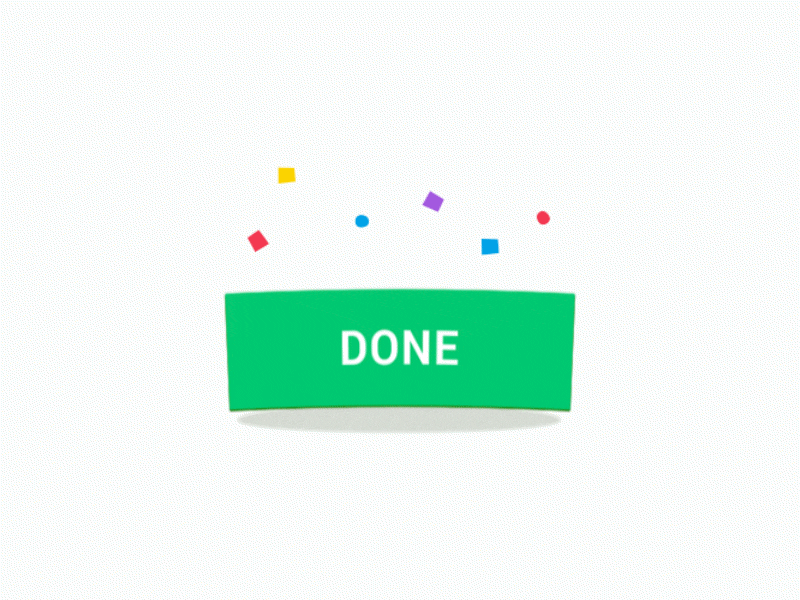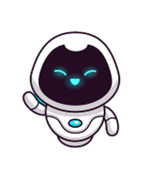

In [ ]:
# %reset -sf